<h1 style="text-align: center;">Used Car Price Prediction Using Linear Regression</h1>
<h4 style="text-align: center;">Ghani Haider |  github.com/Ghani-Haider/</h4>

The [dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) contains information about used cars listed on [www.cardekho.com](https://www.cardekho.com/). We are going to use it for finding predictions of car prices with the use of regression models.

The dataset consist of following features:
- Make : car manufacturer
- Model : car model
- Price : price of the car (target)
- Year : car manufactured year
- Kilometer : km driven
- Fuel Type : petrol, diesel etc
- Transmission : manual/ auto
- Location : city name
- Color : car color
- Owner : first/ second etc
- Seller Type : individual/ corporate
- Engine : cc
- Max Power : bhm @ rpm
- Max Torque : Nm @ rpm
- Drivetrain: FWD/ RWD
- Length: car length
- Width: car width
- Height: car height
- Seating Capacity : number of seats
- Fuel Tank Capacity : litres

<h3>Objectives</h3>
<ul>
    <li> Dataset Pre-processing: Checking for outliers, duplicates, missing values and data-type corrections.
    <li> Feature Extraction
    <li> Exploratory Data Analysis (EDA)
    <li> Feature Selection
    <li> Feature Encoding
    <li> Feature Scaling
    <li> Developing prediction model
    <li> Evaluation and refinement of prediction model through hyper-parameter tuning
</ul>

In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Dataset

In [76]:
df = pd.read_csv('./data/car details v4.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [78]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Feature extraction

Extracting information from the following features:
- Engine (cc)
- Power (bhp)
- Torque (Nm)

In [79]:
import re

# ex: '1230 cc' --> 1230
def get_value(val):
    if val != val:
        return val
    return float(re.split(' |@', val)[0])

# extract numeric values
df['Engine'] = df['Engine'].apply(get_value)
df['Max Power'] = df['Max Power'].apply(get_value)
df['Max Torque'] = df['Max Torque'].apply(get_value)

## Feature transformation

Transforming binary value categorical features to boolean
- Transmission ('Manual' = 0, 'Automatic' = 1)

For features: [Owner, Seller Type] (drawing graph and deciding whether Ordinal Features or Categorical)

In [80]:
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

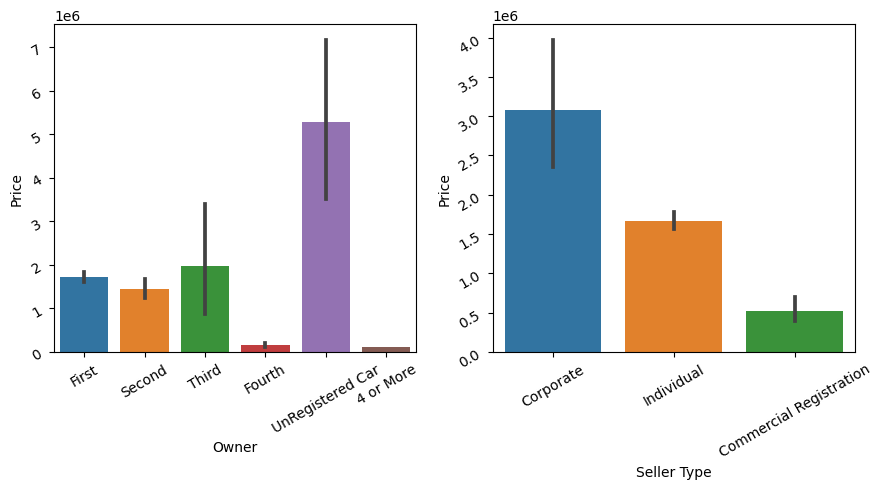

In [81]:
# plot Owner and Seller Type to decide on ordinality
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

sns.barplot(data=df, x='Owner', y='Price', ax=ax[0])
ax[0].tick_params(labelrotation=30)

sns.barplot(data=df, x='Seller Type', y='Price', ax=ax[1])
ax[1].tick_params(labelrotation=30)

plt.tight_layout()
plt.show()

For Owner Feature, ordinality is set as

First = 1 | Second = 2 | Third = 3 | Fourth = 4 | UnRegistered Car = 2.5 | 4 or More = 5

In [82]:
# transforming Owner to ordered var
df['Owner'] = df['Owner'].map({'First':1, 'Second': 2, 'Third': 3, 'Fourth': 4, 'UnRegistered Car': 2.5, '4 or More': 5})

In [83]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,0,Pune,Grey,1.0,Corporate,1198.0,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,0,Ludhiana,White,2.0,Individual,1248.0,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,0,Lucknow,Maroon,1.0,Individual,1197.0,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,0,Mangalore,Red,1.0,Individual,1197.0,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,0,Mumbai,Grey,1.0,Individual,2393.0,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Remove & Impute Missing Data

### Calculate Missing Data Percentage

In [84]:
# calculate percentage of missing data
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    return percent_nan[percent_nan > 0].sort_values()

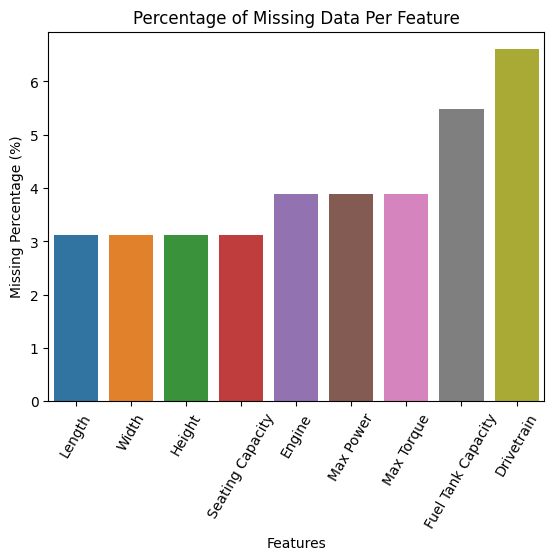

In [85]:
# plot missing percentage
def missing_perc(df):
    percent_miss = percent_missing(df)

    sns.barplot(x=percent_miss.index, y=percent_miss, errorbar=None)
    plt.title('Percentage of Missing Data Per Feature')
    plt.ylabel('Missing Percentage (%)')
    plt.xlabel('Features')
    plt.xticks(rotation=60)
    
    plt.show()

missing_perc(df)

#### Threshold to drop or impute missing values
Intended threshold is set to 1% to drop the missing rows but features are missing data by atleast 3%, therefore I will impute all the missing features by substituting with values averages according to other columns/ features which don't have null values.

Calculating correlation of features to choose columns based on which to calculate average for missing features.

In [86]:
# features correlation
df.corr(numeric_only=True)

,Price,Year,Kilometer,Transmission,Owner,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.311400,-0.150825,0.476843,0.006969,0.615328,0.781419,0.671290,0.556741,0.563996,0.075080,-0.038524,0.584631
Year,0.311400,1.000000,-0.296547,0.171883,-0.329914,-0.004100,0.114438,0.105374,0.098770,0.195493,0.116102,-0.006366,0.064512
Kilometer,-0.150825,-0.296547,1.000000,-0.104907,0.103309,0.061900,-0.032544,0.040419,0.047705,0.017462,0.093592,0.125244,0.055975
Transmission,0.476843,0.171883,-0.104907,1.000000,0.040169,0.481235,0.606559,0.576684,0.545838,0.527580,-0.060581,-0.045128,0.508928
Owner,0.006969,-0.329914,0.103309,0.040169,1.000000,0.152460,0.090257,0.093494,0.076014,0.040156,0.026652,0.054851,0.082455
Engine,0.615328,-0.004100,0.061900,0.481235,0.152460,1.000000,0.871324,0.857029,0.797597,0.711572,0.339709,0.332600,0.801147
Max Power,0.781419,0.114438,-0.032544,0.606559,0.090257,0.871324,1.000000,0.881904,0.794417,0.743734,0.108557,0.054946,0.777689
Max Torque,0.671290,0.105374,0.040419,0.576684,0.093494,0.857029,0.881904,1.000000,0.823881,0.819658,0.279820,0.222575,0.854011
Length,0.556741,0.098770,0.047705,0.545838,0.076014,0.797597,0.794417,0.823881,1.000000,0.807054,0.185451,0.295149,0.813010
Width,0.563996,0.195493,0.017462,0.527580,0.040156,0.711572,0.743734,0.819658,0.807054,1.000000,0.296702,0.221689,0.793868


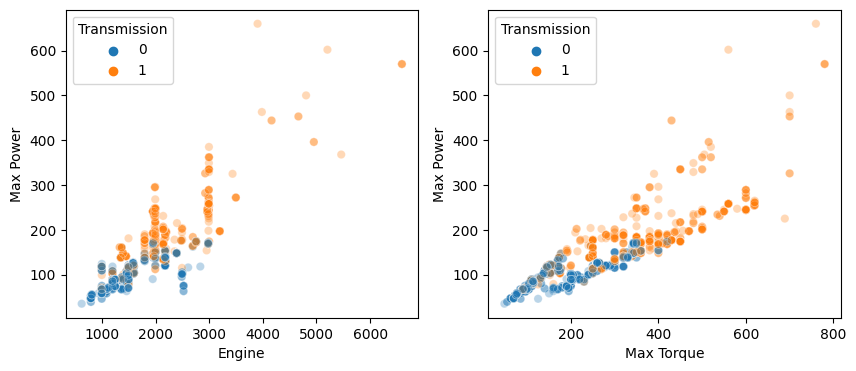

In [87]:
# plot corr with respect to Transmission
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.scatterplot(data=df, x='Engine', y='Max Power', hue='Transmission', alpha=0.3, ax=ax[0])
sns.scatterplot(data=df, x='Max Torque', y='Max Power', hue='Transmission', alpha=0.3, ax=ax[1])

plt.show()

As we can see, Engine, Torque and Power are highly correlated and can be grouped together using Transmission to fill missing values.

In [88]:
# impute avg. values for Engine, Max Torque and Max Power
df[['Engine', 'Max Power', 'Max Torque']] = df.groupby('Transmission')[['Engine', 'Max Power', 'Max Torque']].transform(lambda val: val.fillna(val.mean()))

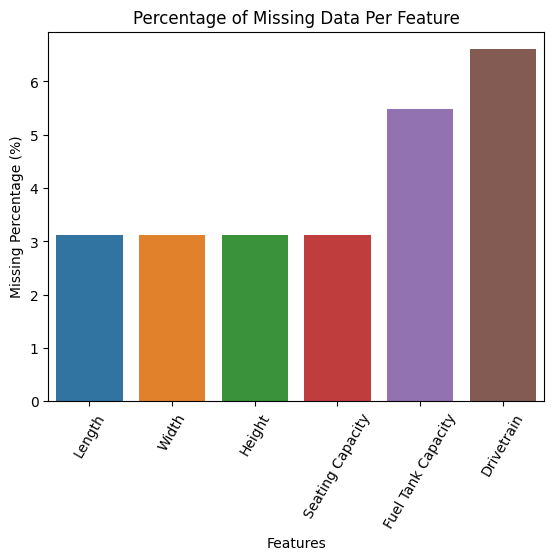

In [89]:
# plot missing percentage
missing_perc(df)

Fixing for Length, Width, Height and Seating Capacity

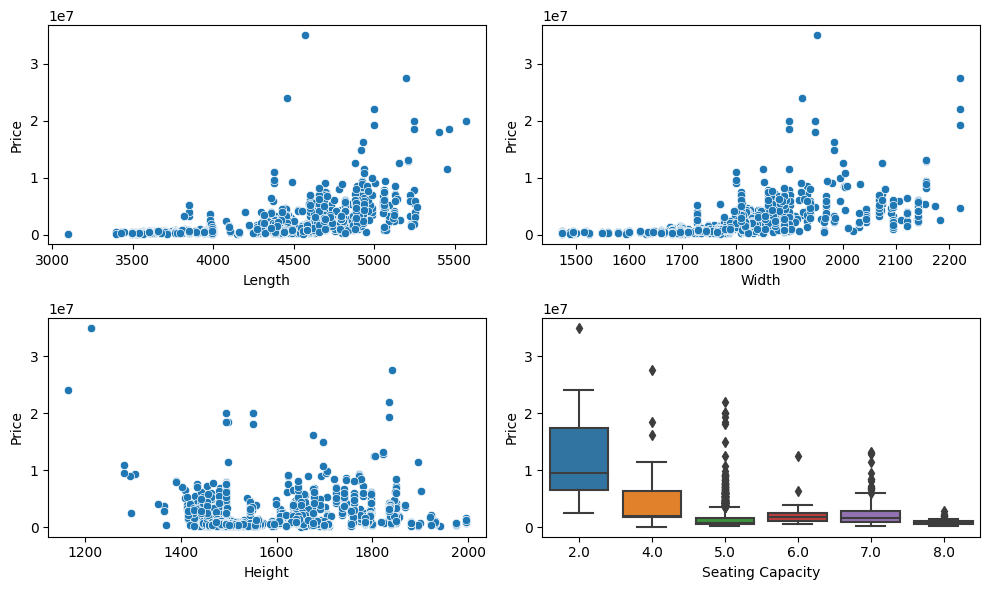

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.scatterplot(data=df, x='Length', y='Price', ax=ax[0][0])
sns.scatterplot(data=df, x='Width', y='Price', ax=ax[0][1])
sns.scatterplot(data=df, x='Height', y='Price', ax=ax[1][0])
sns.boxplot(data=df, x='Seating Capacity', y='Price', ax=ax[1][1])

plt.tight_layout()
plt.show()

Impute avg values for above missing features

In [91]:
df[['Length', 'Height', 'Width', 'Seating Capacity']] = df[['Length', 'Height', 'Width', 'Seating Capacity']].fillna(df[['Length', 'Height', 'Width', 'Seating Capacity']].mean())

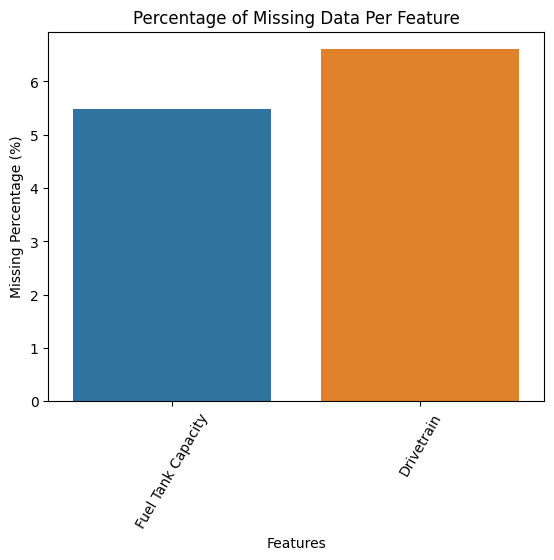

In [92]:
# plot missing percentage
missing_perc(df)

Correlation between Engine and Fuel Tank Capacity, so imputing Fuel Tank Capacity based on group by Engine.

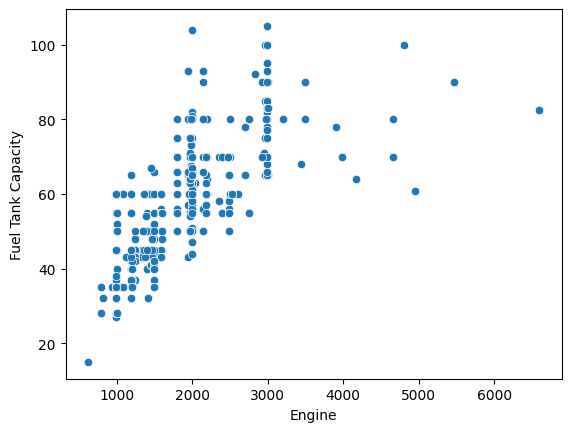

In [93]:
sns.scatterplot(data=df, x='Engine', y='Fuel Tank Capacity')
plt.show()

In [94]:

# substitute fuel tank missing values based on engine group
df['Fuel Tank Capacity'] = df.groupby('Engine')['Fuel Tank Capacity'].transform(lambda val: val.fillna(val.mean()))

Imputing most common/repeated value for Drivetrain ('FWD)

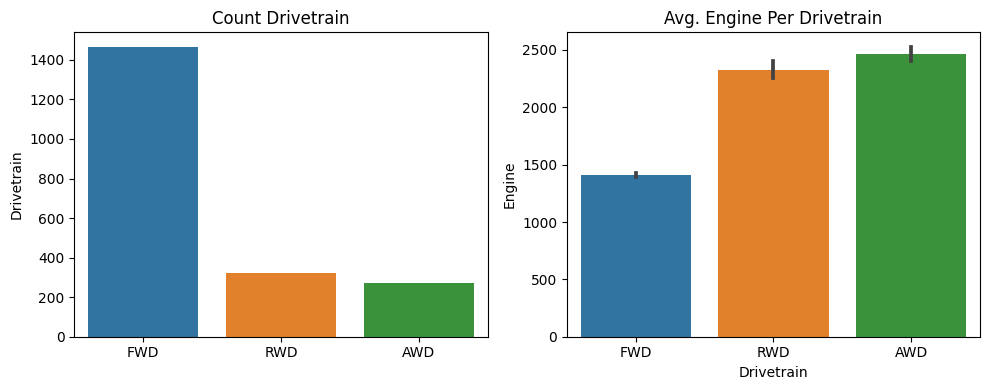

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

drivetrain = df['Drivetrain'].value_counts()
sns.barplot(x=drivetrain.index , y=drivetrain, ax=ax[0])
ax[0].set_title('Count Drivetrain')

sns.barplot(data=df, x='Drivetrain', y='Engine', estimator=np.mean, ax=ax[1])
ax[1].set_title('Avg. Engine Per Drivetrain')

plt.tight_layout()
plt.show()

In [98]:
# fill missing values of Drivetrain with most repeated value
df['Drivetrain'] = df['Drivetrain'].fillna('FWD')

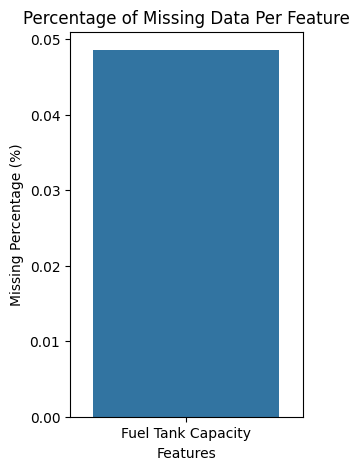

In [99]:
# plot missing percentage
percent_miss = percent_missing(df)

fig = plt.figure(figsize=(3,5))
sns.barplot(x=percent_miss.index, y=percent_miss, errorbar=None)
plt.title('Percentage of Missing Data Per Feature')
plt.ylabel('Missing Percentage (%)')
plt.xlabel('Features')
plt.show()

For 0.05% rows, groupby Engine for Fuel Tank was 'nan', because of no Fuel Tank values within that group. Therefore, dropping them.

In [100]:
df = df.dropna(axis=0, subset=['Fuel Tank Capacity'])

print(f"Percentage of Missing Data = {len(percent_missing(df))}")

Percentage of Missing Data = 0


## Removing outliers

Seeing "Price" correlation and drawing graphs with highly correlated features to capture outliers.

In [101]:
df.corr()['Price'].sort_values()

/tmp/ipykernel_6627/2609039646.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values()


Kilometer            -0.150217
Seating Capacity     -0.020450
Owner                 0.009359
Height                0.090918
Year                  0.318612
Transmission          0.482083
Length                0.562590
Width                 0.566623
Fuel Tank Capacity    0.585889
Engine                0.605015
Max Torque            0.672363
Max Power             0.769002
Price                 1.000000
Name: Price, dtype: float64

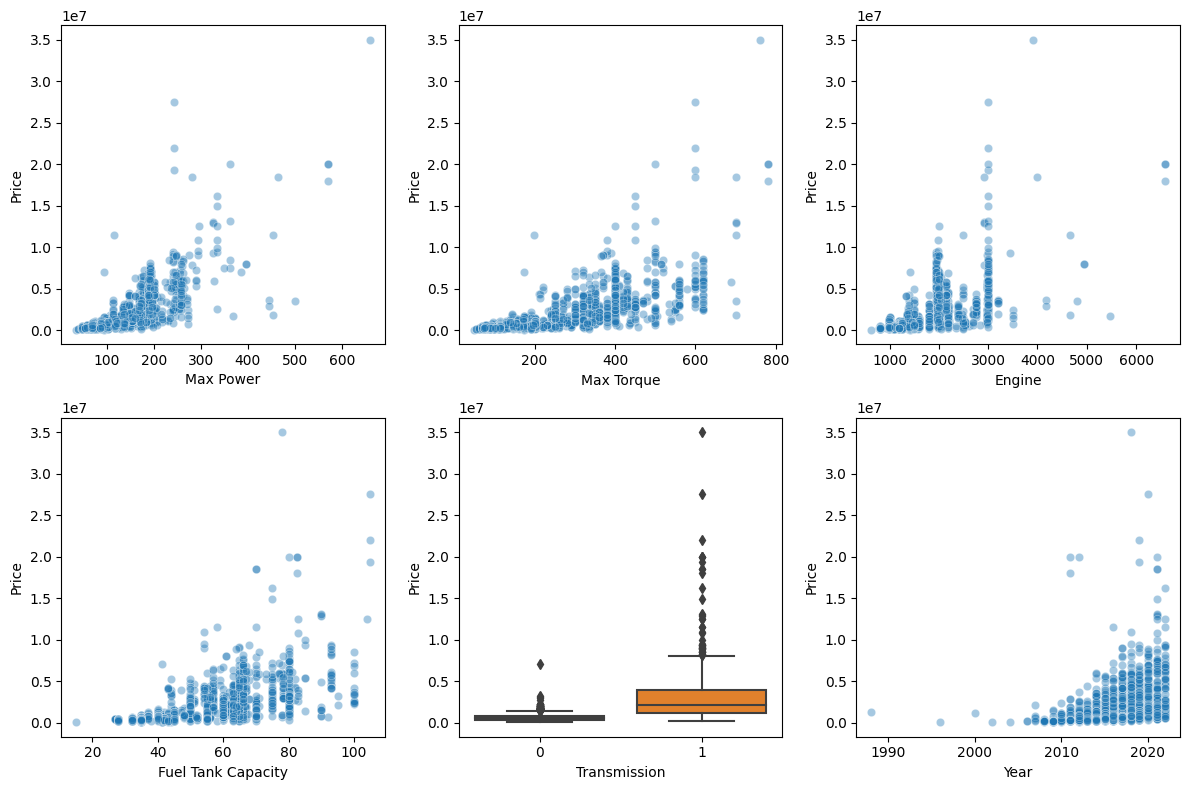

In [102]:
# plot target and feature relationship
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.scatterplot(data=df, x='Max Power', y='Price', ax=ax[0][0], alpha=0.4)
sns.scatterplot(data=df, x='Max Torque', y='Price', ax=ax[0][1], alpha=0.4)
sns.scatterplot(data=df, x='Engine', y='Price', ax=ax[0][2], alpha=0.4)

sns.scatterplot(data=df, x='Fuel Tank Capacity', y='Price', ax=ax[1][0], alpha=0.4)
sns.boxplot(data=df, x='Transmission', y='Price', ax=ax[1][1])
sns.scatterplot(data=df, x='Year', y='Price', ax=ax[1][2], alpha=0.4)

plt.tight_layout()
plt.show()

Check outliers index based on above charts

In [103]:
df[(df['Engine'] > 5000) & (df['Price'] < 5000000)].index

Int64Index([575], dtype='int64')

In [104]:
df[(df['Max Torque'] > 650) & (df['Price'] < 10000000)].index

Int64Index([235, 1322, 1768], dtype='int64')

In [105]:
df[(df['Max Power'] > 400) & (df['Price'] < 5000000)].index

Int64Index([214, 235, 424, 1768], dtype='int64')

Removing common occuring indexes

In [108]:
df_final = df.drop([235, 1768], axis=0)

# export the clean dataset
df_final.to_csv('./data/clean_car_data.csv')

## Categorical Features to Dummy Variables
Converting features that have categorical data to dummy variables to feed the regression model

In [2]:
df = pd.read_csv('./data/clean_car_data.csv', index_col=0)

df_categorical = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')
df_categorical.head()

,Make,Model,Fuel Type,Location,Color,Seller Type,Drivetrain
0,Honda,Amaze 1.2 VX i-VTEC,Petrol,Pune,Grey,Corporate,FWD
1,Maruti Suzuki,Swift DZire VDI,Diesel,Ludhiana,White,Individual,FWD
2,Hyundai,i10 Magna 1.2 Kappa2,Petrol,Lucknow,Maroon,Individual,FWD
3,Toyota,Glanza G,Petrol,Mangalore,Red,Individual,FWD
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],Diesel,Mumbai,Grey,Individual,RWD


Dropping Make, Model, Location & Color feature due to no or very less correlation

In [3]:
# drop uneccessary columns
df_categorical = df_categorical.drop(['Make', 'Model', 'Location', 'Color'], axis=1)

# create dummy variables
df_dummy = pd.get_dummies(df_categorical, drop_first=True)
df = pd.concat([df_int, df_dummy], axis=1)

In [4]:
df.head()

,Price,Year,Kilometer,Transmission,Owner,Engine,Max Power,Max Torque,Length,Width,...,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,0,1.0,1198.0,87.0,109.0000,3990.0,1680.0,...,0,0,0,1,0,0,1,0,1,0
1,450000,2014,75000,0,2.0,1248.0,74.0,190.0000,3995.0,1695.0,...,0,0,0,0,0,0,0,1,1,0
2,220000,2011,67000,0,1.0,1197.0,79.0,112.7619,3585.0,1595.0,...,0,0,0,1,0,0,0,1,1,0
3,799000,2019,37500,0,1.0,1197.0,82.0,113.0000,3995.0,1745.0,...,0,0,0,1,0,0,0,1,1,0
4,1950000,2018,69000,0,1.0,2393.0,148.0,343.0000,4735.0,1830.0,...,0,0,0,0,0,0,0,1,0,1


## Final Look at Feature Correlation

Heatmap below tells that some features are highly correlated, this might create issues while model training and predictions.

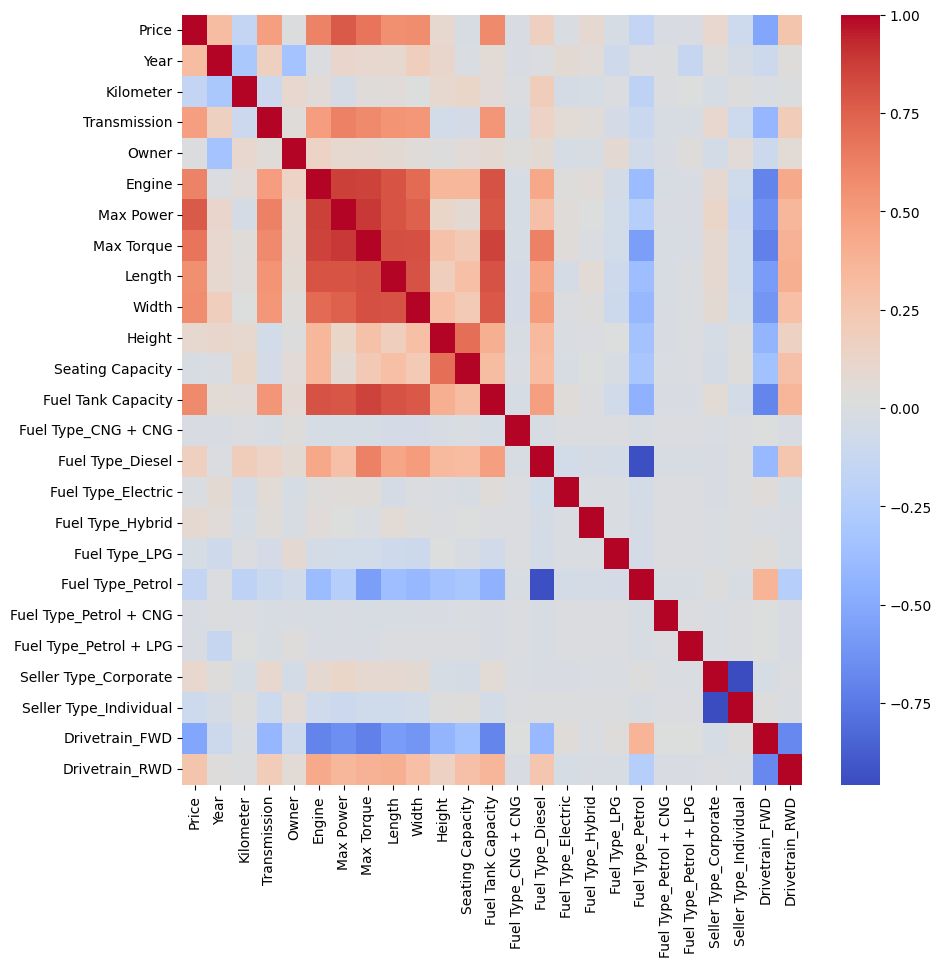

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap='coolwarm')
plt.show()

## Fitting the Regression Model

### Train Test Split
Splitting Data into training and hold-out test set. We will use grid search and cross validation.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

# train + validate and hold-out test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=72)

### Feature Scaling
Using standardization for feature normalization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Choosing base model and hyper-parameter values to tune

In [8]:

from sklearn.linear_model import ElasticNet

base_model = ElasticNet(max_iter=5000)

param_grid = {'alpha':[0.1,1,5,10,100,500],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

### Training Model

In [9]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(estimator=base_model,
                    param_grid=param_grid,
                    scoring='neg_mean_squared_error',
                    cv=10,
                    verbose=0)

model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=5000),
             param_grid={'alpha': [0.1, 1, 5, 10, 100, 500],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [10]:
model.best_estimator_

ElasticNet(alpha=1, l1_ratio=0.99, max_iter=5000)

In [11]:
# coefficent values for model features
model.best_estimator_.coef_

array([ 533994.80120572, -109716.76659791, -128357.77347623,
         81691.69855328, -300424.45175452, 2105289.08122494,
        172271.68717849, -243265.7198298 , -128720.5974748 ,
        -10482.16470075, -117246.25855642,   87458.71556089,
             0.        , -169811.53216867, -150771.58692533,
        197357.64173205,   36829.45275483, -154514.6361937 ,
        -11074.12333604,   59536.50120892,   -6993.16077536,
         -8042.16669218, -176607.47523005,   -8575.06221626])

### Prediction on Holdout Test Set

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# prediction on the test set
y_predict = model.predict(scaled_X_test)

print(f'Price Avg Value:\t{y.mean()}')
print(f'MAE:\t{mean_absolute_error(y_test, y_predict)}')
print(f'RMSE:\t{np.sqrt(mean_squared_error(y_test, y_predict))}')

Price Avg Value:	1691189.155155642
MAE:	707848.8203328333
RMSE:	1374148.7723650376


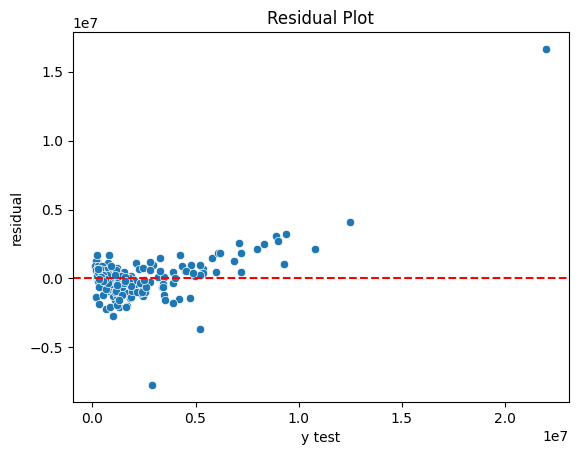

In [13]:
residual = y_test - y_predict

sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('y test')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.show()

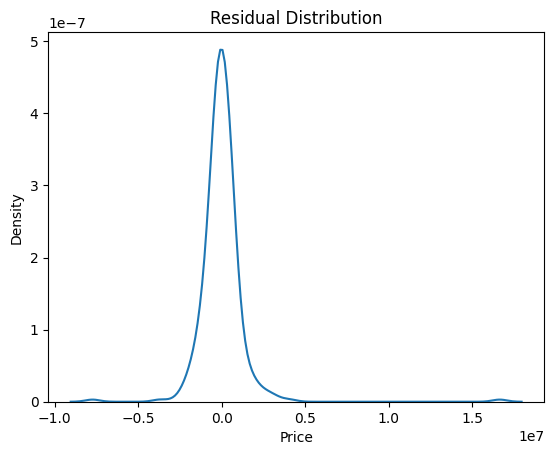

In [14]:
sns.kdeplot(residual)
plt.title('Residual Distribution')
plt.show()

## Save Model

In [15]:
from joblib import dump

dump(model, './model/car_price_pred.joblib')

['./model/car_price_pred.joblib']